# Excercise 5
## Name : Ekanayaka S.D.
## Index : 190162F



### Question 1

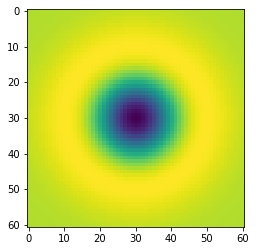

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma

X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

LoG = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(LoG)

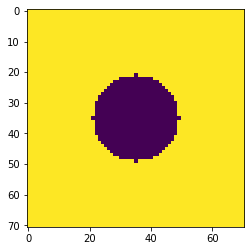

In [3]:
w,h = 71,71
hw = w//2
hh = h//2

f = np.ones((h,w),dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))

r = w//5 #14

f*= X**2+Y**2 > r**2

plt.imshow(f)

### Question 2

(35, 35, 5)
10


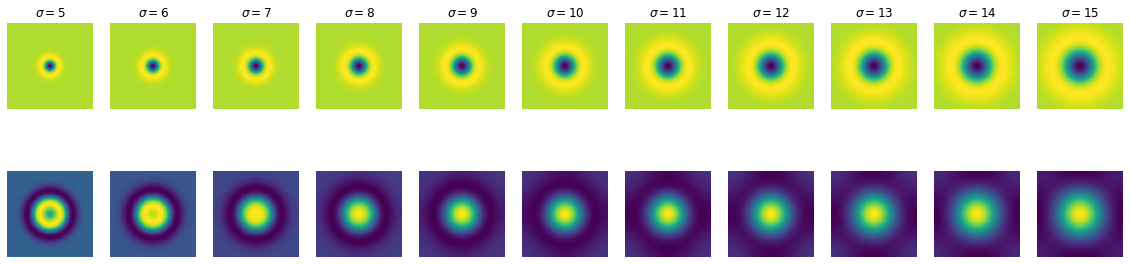

In [14]:
import numpy as np
import cv2 as cv
s = 11
fig,ax = plt.subplots(2,s,figsize=(20,5))
sigmas = np.arange(5,16,1)
scale_space = np.empty((h,w,s),dtype = np.float32)
for i, sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis("off")
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
    
indices = np.unravel_index(np.argmax(scale_space,axis = None),scale_space.shape)
print(indices) # r = \sqrt{2}*sigma
print(sigmas[indices[2]])
    

### Question 3

(-0.5, 1599.5, 639.5, -0.5)

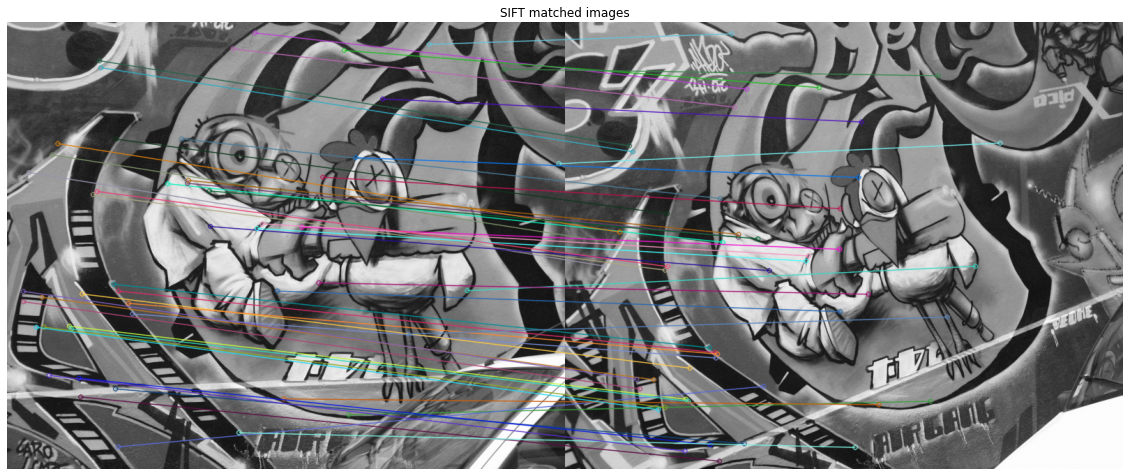

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# read images
image1 = cv2.imread('img1.ppm')  
image2 = cv2.imread('img2.ppm') 

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
fig,ax = plt.subplots(1,1,figsize=(20,20))
ax.set_title("SIFT matched images")
ax.imshow(img3)
ax.axis('off')

### Question 4

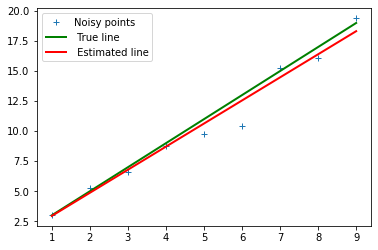

In [30]:
# least - squres line  fitting

m = 2 # Line equation:  
c = 1
x = np.arange(1,10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np. zeros(x.shape) 
y = m*x + c + noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1),np.ones((n,1))],axis=1)
B = np.linalg.pinv(X.T @X) @ X.T @y

mstar = B[0]
cstar = B[1]
plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g',linewidth = 2,label = r' True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+c,mstar*x[-1]+cstar],color = 'r',linewidth = 2,label = r' Estimated line')   
plt.legend()


### Question 5

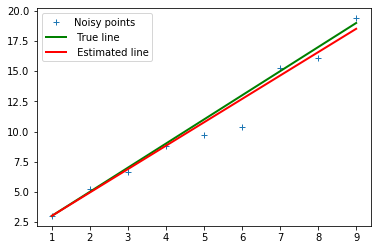

In [29]:

m = 2 # Line equation:  
c = 1
x = np.arange(1,10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np. zeros(x.shape) 
y = m*x + c + noise + o

n = len(x)

u11 = np.sum((x-np.mean(x))**2)
u12= np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)


U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)
ev_corresponding_to_smalest_ev = V[:,np.argmin(W)]

a = ev_corresponding_to_smalest_ev[0]
b = ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b
cstar = d/b

plt.plot(x,y,'+',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color = 'g',linewidth = 2,label = r' True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+c,mstar*x[-1]+cstar],color = 'r',linewidth = 2,label = r' Estimated line')   
plt.legend(loc='best')
            
            